In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

In [16]:
n = 100
x = np.array([i for i in range(n)])

In [17]:
U = 50
a = 1
eps = 0.00001
def f(E, U = 1, a = 1):
    return np.tan(np.sqrt(2*(U - E))*a) - np.sqrt(E/(U - E))

In [18]:
def find_asymptote(k = 0):
    return np.abs(U - math.pow(math.pi*k + math.pi/2.0, 2) * 1.0 / (2* math.pow(a, 2)))

In [19]:
def plot_res_E(res, E, n, style = '-'):
    plt.grid()
    plt.ylim(-10, 10)
    plt.plot(E[:n], res[:n], style)

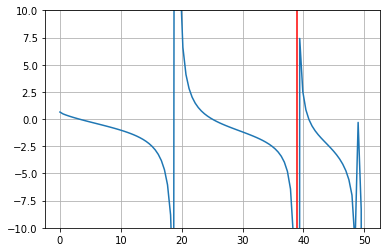

In [20]:
E = np.linspace(eps, U-eps*U, n) #[i for i in range(U)]
E = np.flip(E)
res = [f(e, U) for e in E]
plot_res_E(res, E,n)
plt.plot(np.full(10, find_asymptote(1)), np.linspace(-10, 10, 10), 'r')

# Метод дихотомии

In [21]:
def get_sign(x, U, a = 1):
    return f(x, U, a) > 0

In [22]:
def split_segment(x0, x1, U, a = 1):
    median = (x1 + x0)/2
    sign_median = get_sign(median, U, a)
    sign_x0 = get_sign(x0, U, a)
    sign_x1 = get_sign(x1, U, a)
    if (sign_x0 != sign_median):
        return (x0, median)
    elif (sign_x1 != sign_median):
        return (median, x1)
    else:
        return (x0, x1)

In [88]:
def split(x0, x1, func):
    median = (x1 + x0)/2
    sign_median = np.sign(func(median)) # get_sign(median, U, a)
    sign_x0 = np.sign(func(x0)) # get_sign(x0, U, a)
    sign_x1 = np.sign(func(x1)) #get_sign(x1, U, a)
    if (sign_x0 != sign_median):
        return (x0, median)
    elif (sign_x1 != sign_median):
        return (median, x1)
    else:
        return (x0, x1)

In [89]:
def find_x(x0, x1):
    prec = 1000
    (curr_a, curr_b) = (x0, x1)#find_x0_x1(E, U)
    for i in range(prec):
        (next_a, next_b) = split_segment(curr_a, curr_b, U)
        if (next_a == curr_a and next_b == curr_b):
            break
        (curr_a, curr_b) = (next_a, next_b)
    return (curr_a + curr_b)/2.

In [90]:
prec = 100
(curr_a, curr_b) = (E[0], find_asymptote(1))#find_x0_x1(E, U)
for i in range(prec):
    (next_a, next_b) = split_segment(curr_a, curr_b, U)
    if (next_a == curr_a and next_b == curr_b):
        break
    (curr_a, curr_b) = (next_a, next_b)

In [91]:
(curr_a, curr_b)

(40.87887230842403, 40.87887230842402)

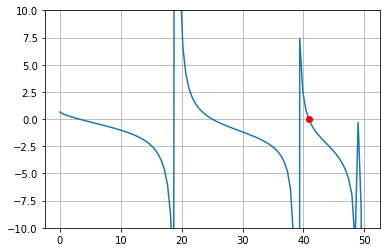

In [92]:
plot_res_E(res, E, n)
plt.plot(curr_a, 0, "ro")
# plt.plot(curr_b, 0, 'bo')

ФОМЭ

In [142]:
# me - кг
# T - кельв
h = 6.6*1e-34 #СИ
k = 1.38*1e-23 # СИ
m0 = 9.1*1e-31 # СИ
Eg = 1.12 # eV
Jd = 50*1e-3 # eV
Ec = Eg
Ev = 0
Ed = Eg - Jd
me = 1.06*m0
mh = 1.82*m0
T = 300
Nd = 1e17*1e6



def convert_Joule_To_eV(J):
    return J*6.2*1e18

def get_N(m, T):
    # m - кг
    root = 2*np.pi*m*k*T/(h)**2
    return 2*np.power(root, 3./2.)

def get_n(m, Ec, Ef, T):
    N = get_N(m, T)
    return N*np.exp(- (Ec - Ef)/(convert_Joule_To_eV(k*T)))

def get_p(m, Ef, Ev):
    N = get_N(m, T)
    return N*np.exp(-(Ef - Ev)/convert_Joule_To_eV(k*T))

def get_Nd_ion(Nd, Ef, Ed, T):
    return Nd/(1 + 0.5*np.exp((Ef - Ed)/convert_Joule_To_eV(k*T)))

def get_E0(me, mh, T):
    a = (Ec + Ev)/2. + 3./4.* convert_Joule_To_eV(k*T)*np.log(me/mh)
    return a

def get_E1(Ec):
    return Ec


In [143]:
def Q_equation(Ef):
    return get_n(me, Ec, Ef, T) - get_p(mh, Ef, Ev) - get_Nd_ion(Nd, Ef, Ed,T)
print(Q_equation(get_E1(Ec)))
print(Q_equation(get_E0(me, mh, T)))

2.762744720204961e+25
-1.0000002500006637e+23


In [144]:
def find_fermi_lvl(x0, x1):
    prec = 100
    (curr_a, curr_b) = (x0, x1)
    for i in range(prec):
        (next_a, next_b) = split(curr_a, curr_b, Q_equation)
        if (next_a == curr_a and next_b == curr_b):
            break
        (curr_a, curr_b) = (next_a, next_b)
    return (curr_a + curr_b)/2.

In [145]:
x = find_fermi_lvl(get_E0(me, mh, T), get_E1(Ec))
x

0.9753698784565983

In [182]:
# Ge

# me - кг
# T - кельв
h = 6.6*1e-34 #СИ
k = 1.38*1e-23 # СИ
m0 = 9.1*1e-31 # СИ
Eg = 0.661 # eV
Jd = 0.010 # 50*1e-3 # eV
Ec = Eg
Ev = 0
Ed = Eg - Jd
T = 300
Nd = 1e17 #*1e6

me = 0.22*m0
mh = 0.34*m0

In [183]:
me

2.002e-31

In [184]:
mh

3.094e-31

In [185]:
x = find_fermi_lvl(get_E0(me, mh, T), get_E1(Ec))
x

0.339018715166996

# Метод простых итераций

In [75]:
def get_next(x, phi):
    return phi(x)

In [156]:
f1 = lambda x : f(x, U)
x0 = (find_asymptote(1) + find_asymptote(0))/2.0
l = -1/derivative(f1, x0, dx = eps / 100)
def phi_1(x):
    return x +  0.07* f(x,U) # 0.0007*

In [157]:
def check_df_dx(phi, x):
    return np.abs(derivative(phi, x, dx = eps / 100))

In [158]:
check_df_dx(phi_1, eps/10)

3.965904631572647

In [159]:
#xs = []
def find_x(eps, E, phi):
    n = 0
    x0 = (find_asymptote(1) + find_asymptote(0))/2.0
    N_max = 100000
    for i in range(N_max):
        x1 = get_next(x0, phi)
        x2 = get_next(x1, phi)
        if (need_to_stop(x0, x1, x2, eps)):
            break
        n += 1
        x0 = x1
        #xs.append(x0)
    print(n)
    return x1

In [160]:
def need_to_stop(x_n_0, x_n_1, x_n_2, eps):
#     diff_2 = x_n_2 - x_n_1
#     diff_1 = x_n_1 - x_n_0
#     return np.abs(diff_2/(1 - diff_2/diff_1)) <= eps
   return np.abs(x_n_1 - x_n_2) <= eps and x_n_1 != x_n_2

In [161]:
#eps = 0.1
x = find_x(eps, E, phi_1)
x

108


40.878968407121725

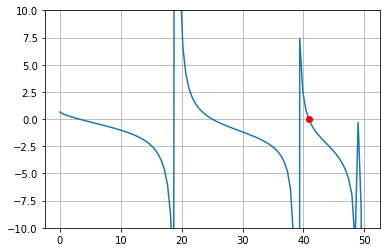

In [162]:
plot_res_E(res, E, n)
#plt.plot(xs, np.zeros(len(xs)), 'ro')
plt.plot(x, 0, 'ro')

# Метод Ньютона

In [20]:
def df(E, U, a = 1):
    diff = U - E
    return -1/np.power(np.cos(np.sqrt(2*diff)*a), 2)*a/np.sqrt(2*diff) - U/(2*np.sqrt(E))/(np.power(diff, 3./2.))

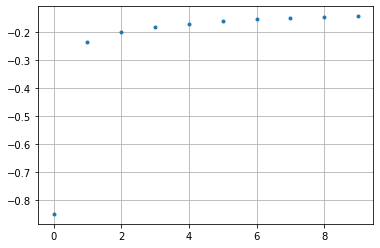

In [21]:
df_res = [df(e, U) for e in E]
df_res.reverse()
plt.grid(True)
#условие сходимости для Ньютона 
plt.plot(df_res[:n//10], '.')

In [22]:
def get_next_x(x_n, U, a = 1):
    return x_n - f(x_n, U, a)/df(x_n, U, a)

In [85]:
#eps = 0.001
def phi(x):
    return get_next_x(x, U)
x = find_x(eps, E, phi)
x

5


40.87887230837137

In [63]:
def get_Newton_cond(f, x):
    #d1 = derivative(f, x, dx = eps / 10, n = 1)
    #d2 = derivative(f, x, dx = eps / 10, n = 2)
    #return np.abs(f(x)*d2/d1**2)
    return derivative(f, x, dx = eps / 10, n = 2)

In [64]:
get_Newton_cond(f, eps/10)

18753.85012511277

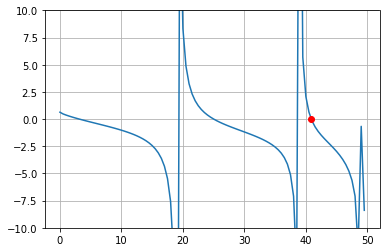

In [65]:
plot_res_E(res, E, n)
plt.plot(x, 0, 'ro')